In [1]:
import numpy as np
from sympy import * 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from numpy.linalg import norm, solve
sns.set_theme()

# Общий вид краевой задачи:
# k * u_xx + p * u_x + q * u = f

In [2]:
def find_u(n, eps = 100):
    def solve_integral(foo):
        h = (b-a)/eps
        x = [a + i*h for i in range(eps+1)]
        f = [foo(t) for t in x]
        res = 0
        for k in range(1, eps, 2):
            res += f[k-1] + 4*f[k] + f[k+1]
        return res*h/3

    def generate_phi():  # n - количество уравнений, k - параметр многочлена Якоби
        p = []
        for i in range(n):    
            if i == 0:
                p.append(expand(1-x**2))
            elif i == 1:
                p.append(expand((1-x**2)*(k+1)*x))
            else:
                p.append(expand(((i+k+2)*(2*i+2*k+3)*x*p[-1]-(i+k+2)*(i+k+1)*p[-2])/((i+2*k+2)*(i+2))))
        p1 = [diff(item) for item in p]
        p2 = [diff(item) for item in p1]
        return p, p1, p2
    
    def generate_c():
        c = []
        for i in range(n):
            c.append(simplify(k*phi[2][i] + p*phi[1][i] + q*phi[0][i]))
        return c

    def solve_system():
        m_a = np.matrix(np.zeros((n, n)))
        m_b = np.matrix(np.zeros((n, 1)))
        for i in range(n):
            m_b[i, 0] = solve_integral(lambdify(x, f*phi[0][i]))
            for j in range(n):
                m_a[i, j] = solve_integral(lambdify(x, c[j]*phi[0][i]))
        return m_a.getI()*m_b

    
    phi = generate_phi()
    c = generate_c()
    alpha = solve_system()
    u = expand(sum([phi[0][i]*alpha[i,0] for i in range(n)]))
    return lambdify(x, u)

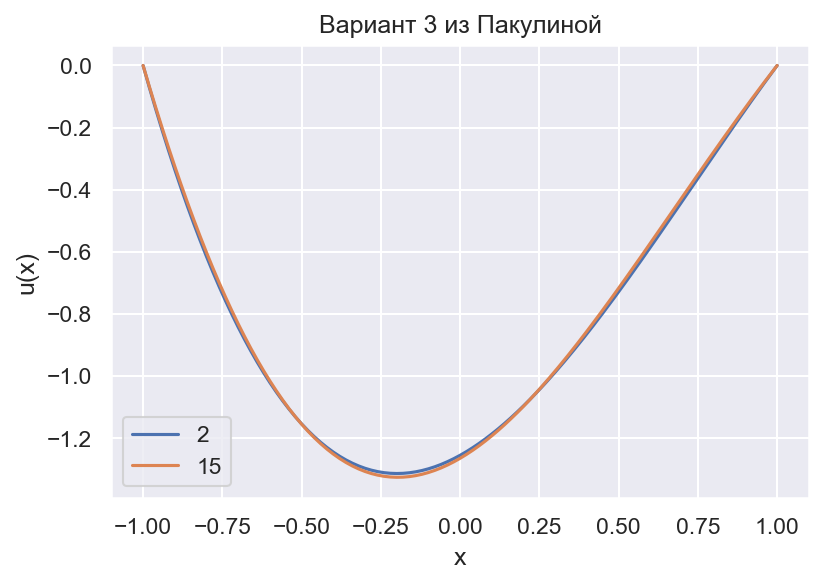

In [8]:
x = Symbol('x')
k = 1/(3-x)
p = 1+x/2
q = exp(x/2)
f = 2-x
a, b = -1, 1
k = 1

u = [find_u(n, eps = 100) for n in range(2, 16, 13)]

grid_left = - 1
grid_right = 1
grid_number = 200
grid = [grid_left + i * (grid_right - grid_left)/grid_number for i in range(grid_number+1)]

y = []
for foo in u:
    y.append([foo(dot) for dot in grid])
    
plt.figure(dpi=150)
plt.plot(grid, y[0])
plt.plot(grid, y[1])
plt.title('Вариант 3 из Пакулиной')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(['2', '15'])

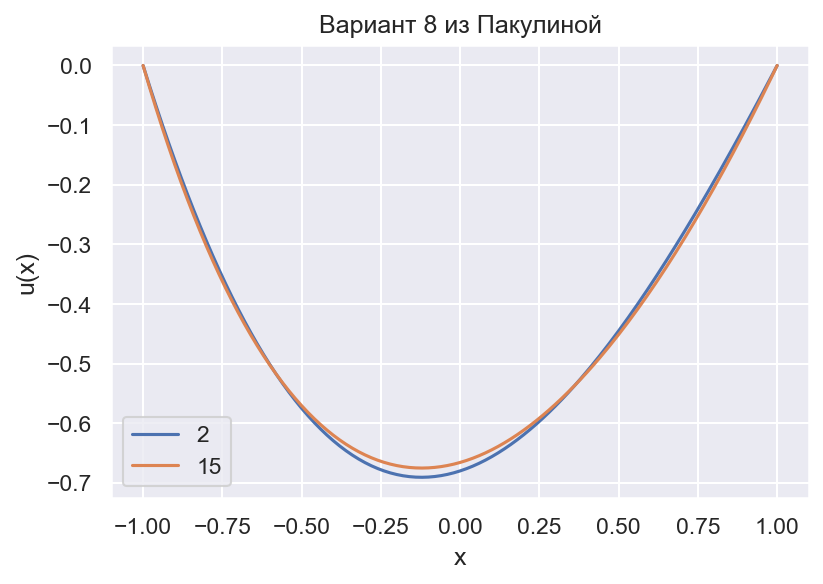

In [9]:
x = Symbol('x')
k = (x-4)/(5-2*x)
p = 1-x/2
q = ln(3+x)/2
f = 1+x/3
a, b = -1, 1
k = 1

u = [find_u(n, eps = 100) for n in range(2, 16, 13)]

grid_left = - 1
grid_right = 1
grid_number = 200
grid = [grid_left + i * (grid_right - grid_left)/grid_number for i in range(grid_number+1)]

y = []
for foo in u:
    y.append([foo(dot) for dot in grid])

plt.figure(dpi=150)
plt.plot(grid, y[0])
plt.plot(grid, y[1])
plt.title('Вариант 8 из Пакулиной')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(['2', '15'])